In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
folder = "D:\\Personal\\Data Science\\Projects\\OilWells\\"

In [2]:
ds = pd.read_excel(folder + "RCE Wells on Pumping Units.xlsx", sheet_name=None)
sheets = [i for i in ds.keys()]
sheets

['Well List',
 'Summary',
 'CHRISTIAN #8',
 "FURRH B #2  (TA'D)",
 'INTERNATIONAL PAPER #2     (TRA',
 'FLANAGAN #2',
 "KINNEY, J.C. #1C  (TA'D)",
 'KINNEY, J.C. #1T',
 'LONE STAR #2',
 'SHARPE, DOT #2',
 'FURRH, JD JR. ET AL #1',
 "METCALF, FRED #3  (TA'D)",
 'AVERY RENEE GU 1 #1',
 'BLACK STONE #4  (SI)',
 'SMITH J. GU 1 #1 (SI)',
 'STEWART, G.P. #5  (AUSTIN CHALK',
 'WILL FORESTER GU 1 #1',
 'LINNIE -M- GAS UNIT #6     (TRA',
 'LINNIE -M- GAS UNIT #8',
 'COLEMAN GU 1 #2  (PETTIT)']

In [4]:
ds['Well List'].head(5)

,,Well Completion/Facility,Well Completion Status,Producing Method,API,RCE Field
0,1036041,International Paper #2(TRAVIS PEAK),TA,Pumping Unit,42365351240000,BETHANY
1,1032367,Christian #8,Producing,Pumping Unit,42365327260000,BETHANY
2,1033821,Furrh B #2,TA,Pumping Unit,42365335840000,BETHANY
3,1033812,Flanagan #2,Producing,Pumping Unit,42183307000000,DANVILLE
4,1033841,"Kinney, JC #1C",TA,Pumping Unit,42183002270000,DANVILLE


In [5]:
ds['Summary'].head()

,Well,Summary,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,From,1/1/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,To,1/16/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Date,Alloc HCLiq (bbl),Alloc Gas (MCF),Alloc Wat (bbl),DT (hr),P(tub) (psi),P(cas) (psi),P(line) (psi),WH Temp (°F),"Chk Sz (1/64"")",NaN
4,2000-01-01 00:00:00,39.392,0,0,0,50,230,0,0,0,NaN


In [6]:
cols = ds[sheets[1]].iloc[3,:].values
cols

array(['Date', 'Alloc HCLiq (bbl)', 'Alloc Gas (MCF)', 'Alloc Wat (bbl)',
       'DT (hr)', 'P(tub) (psi)', 'P(cas) (psi)', 'P(line) (psi)',
       'WH Temp (°F)', 'Chk Sz (1/64")', nan], dtype=object)

In [7]:
cols = np.take(cols,[0,1,2,3,4,5,6,7,8,9])

In [59]:
Christian = ds[sheets[2]].iloc[4:,:-1]

In [60]:
Christian.shape

(6956, 10)

In [61]:
Christian.columns = cols
Christian.columns

Index(['Date', 'Alloc HCLiq (bbl)', 'Alloc Gas (MCF)', 'Alloc Wat (bbl)',
       'DT (hr)', 'P(tub) (psi)', 'P(cas) (psi)', 'P(line) (psi)',
       'WH Temp (°F)', 'Chk Sz (1/64")'],
      dtype='object')

In [38]:
Christian.head(2)

,Date,Alloc HCLiq (bbl),Alloc Gas (MCF),Alloc Wat (bbl),DT (hr),P(tub) (psi),P(cas) (psi),P(line) (psi),WH Temp (°F),"Chk Sz (1/64"")"
4,2000-01-01 00:00:00,39.392,0,0,0,50,230,0,0,0
5,2000-01-02 00:00:00,0,0,0,0,50,230,0,0,0


In [65]:
Christian['Date'] = pd.to_datetime(Christian['Date'])
Christian['byYear'] = Christian.Date.dt.to_period("Y")
Christian['byYearInt'] = Christian['byYear'].astype(str)
Christian['byYearInt'] = Christian['byYearInt'].astype(int)
for i in range(1,9):
    Christian[cols[i]] = Christian[cols[i]].astype('float')

In [66]:
Christian.head(2)

,Date,Alloc HCLiq (bbl),Alloc Gas (MCF),Alloc Wat (bbl),DT (hr),P(tub) (psi),P(cas) (psi),P(line) (psi),WH Temp (°F),"Chk Sz (1/64"")",byYear,byYearInt
4,2000-01-01,39.391998,0.0,0.0,0.0,50.0,230.0,0.0,0.0,0,2000,2000
5,2000-01-02,0.000000,0.0,0.0,0.0,50.0,230.0,0.0,0.0,0,2000,2000


In [67]:
for i in range(1,9):
    u = Christian[cols[i]].unique()
    print(i, cols[i], len(u))
print('Looks like columns DT(hr), P(line), WH Temp do not have data, so they can be removed')    

1 Alloc HCLiq (bbl) 266
2 Alloc Gas (MCF) 6065
3 Alloc Wat (bbl) 470
4 DT (hr) 1
5 P(tub) (psi) 98
6 P(cas) (psi) 107
7 P(line) (psi) 1
8 WH Temp (°F) 1
Looks like columns DT(hr), P(line), WH Temp do not have data, so they can be removed


In [68]:
Christian.describe()

,Alloc HCLiq (bbl),Alloc Gas (MCF),Alloc Wat (bbl),DT (hr),P(tub) (psi),P(cas) (psi),P(line) (psi),WH Temp (°F),byYearInt
count,6956.000000,6956.000000,6956.000000,6956.0,6956.000000,6956.000000,6956.0,6956.0,6956.000000
mean,0.552873,79.027978,6.556116,0.0,52.193646,65.865871,0.0,0.0,2009.022283
std,9.128725,64.319993,13.886433,0.0,115.293811,159.773347,0.0,0.0,5.492450
min,-180.046997,0.000000,-47.590000,0.0,0.000000,0.000000,0.0,0.0,2000.000000
25%,0.000000,29.965751,0.000000,0.0,0.000000,0.000000,0.0,0.0,2004.000000
50%,0.000000,67.696999,0.000000,0.0,0.000000,0.000000,0.0,0.0,2009.000000
75%,0.000000,111.244253,6.670000,0.0,70.000000,60.000000,0.0,0.0,2014.000000
max,184.207001,553.893005,191.660995,0.0,1180.000000,5000.000000,0.0,0.0,2019.000000


In [43]:
print('Alloc HCLiq (bbl) and Alloc Wat (bbl) have negative values')

Alloc HCLiq (bbl) and Alloc Wat (bbl) have negative values


In [71]:
Christian[Christian[cols[1]] < 0].shape

(38, 12)

In [72]:
Christian[Christian[columns[3]] < 0 ].shape

(9, 12)

In [76]:
AllWells = Christian[(Christian[columns[1]] >= 0)]

In [77]:
AllWells = AllWells[(Christian[columns[3]] >= 0)]

In [78]:
AllWells.describe()

,Alloc HCLiq (bbl),Alloc Gas (MCF),Alloc Wat (bbl),DT (hr),P(tub) (psi),P(cas) (psi),P(line) (psi),WH Temp (°F),byYearInt
count,6912.000000,6912.000000,6912.000000,6912.0,6912.000000,6912.000000,6912.0,6912.0,6912.000000
mean,0.778677,78.904029,6.529729,0.0,52.023148,65.580584,0.0,0.0,2009.048177
std,7.336301,64.121217,13.705539,0.0,114.473862,159.077863,0.0,0.0,5.488243
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,2000.000000
25%,0.000000,29.911000,0.000000,0.0,0.000000,0.000000,0.0,0.0,2004.000000
50%,0.000000,67.764999,0.000000,0.0,0.000000,0.000000,0.0,0.0,2009.000000
75%,0.000000,111.171751,6.670000,0.0,70.000000,60.000000,0.0,0.0,2014.000000
max,184.207001,553.893005,191.660995,0.0,1180.000000,5000.000000,0.0,0.0,2019.000000


In [53]:
print ('Group data by year by adding data points')


Group data by year by adding data points


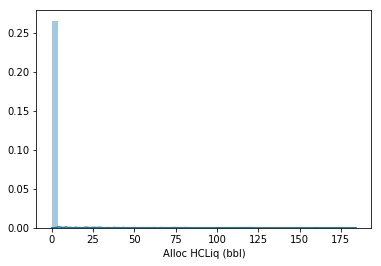

In [82]:
sns.distplot(AllWells[cols[1]])

In [56]:
Christian.head()

,Date,Alloc HCLiq (bbl),Alloc Gas (MCF),Alloc Wat (bbl),DT (hr),P(tub) (psi),P(cas) (psi),P(line) (psi),WH Temp (°F),"Chk Sz (1/64"")",byYear,byYearInt
35,2000-02-01,8.271000,0.000000,4.138000,0.0,80.0,450.0,0.0,0.0,0,2000,2000
295,2000-10-18,0.066000,67.263000,0.027000,0.0,100.0,250.0,0.0,0.0,0,2000,2000
375,2001-01-06,74.490997,435.794006,8.277000,0.0,85.0,400.0,0.0,0.0,0,2001,2001
504,2001-05-15,86.912003,302.971985,41.389999,0.0,120.0,510.0,0.0,0.0,0,2001,2001
529,2001-06-09,28.966999,243.348007,20.691999,0.0,125.0,500.0,0.0,0.0,0,2001,2001


In [58]:
Christian.shape

(137, 12)

In [182]:
print('Find what wells can be used for exploration:')
usesheets = []
for j in range(2,len(sheets)):
    Christian = ds[sheets[j]].iloc[4:,:-1]
    Christian.columns = cols
    #print('Sheet', j, sheets[j])
    for i in range(1,9):
        u = Christian[cols[i]].unique()
        if (i == 5):
            print('Sheet', j, i, cols[i], len(u))
            if (len(u) > 10):
                usesheets.append(j)
print('Wells that can be looked at:', usesheets)

Find what wells can be used for exploration:
Sheet 2 5 P(tub) (psi) 98
Sheet 3 5 P(tub) (psi) 5
Sheet 4 5 P(tub) (psi) 4
Sheet 5 5 P(tub) (psi) 44
Sheet 6 5 P(tub) (psi) 1
Sheet 7 5 P(tub) (psi) 10
Sheet 8 5 P(tub) (psi) 56
Sheet 9 5 P(tub) (psi) 93
Sheet 10 5 P(tub) (psi) 42
Sheet 11 5 P(tub) (psi) 3
Sheet 12 5 P(tub) (psi) 100
Sheet 13 5 P(tub) (psi) 8
Sheet 14 5 P(tub) (psi) 3
Sheet 15 5 P(tub) (psi) 41
Sheet 16 5 P(tub) (psi) 91
Sheet 17 5 P(tub) (psi) 20
Sheet 18 5 P(tub) (psi) 85
Sheet 19 5 P(tub) (psi) 7
Wells that can be looked at: [2, 5, 8, 9, 10, 12, 15, 16, 17, 18]


Oil Well:  2 CHRISTIAN #8


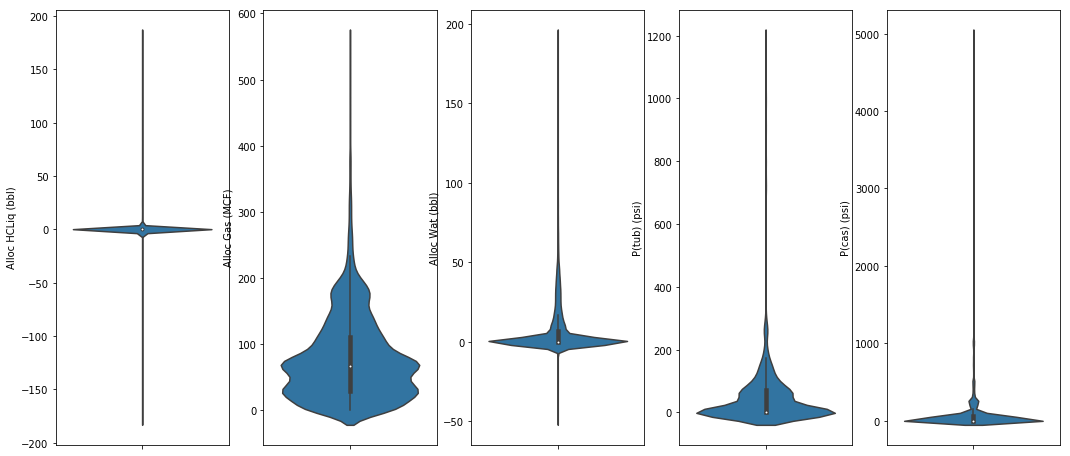

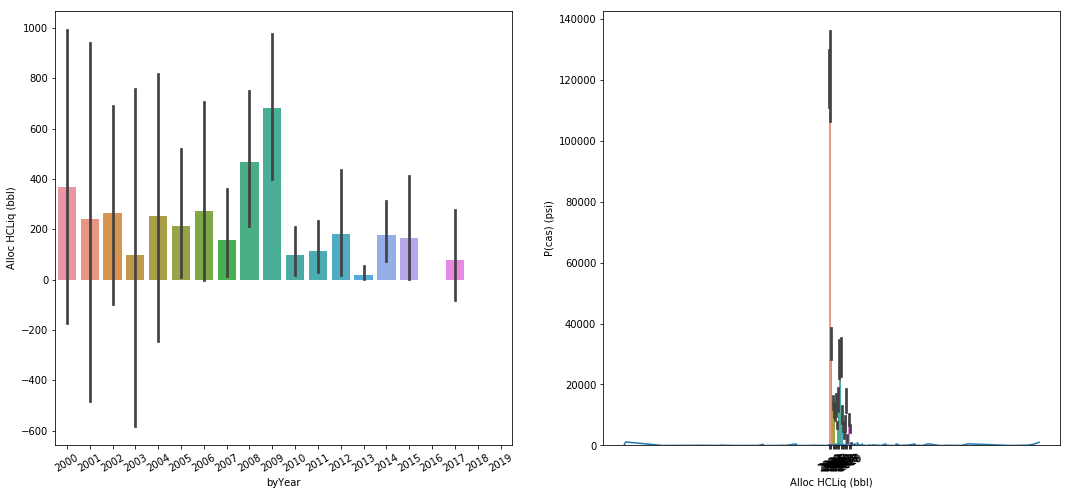

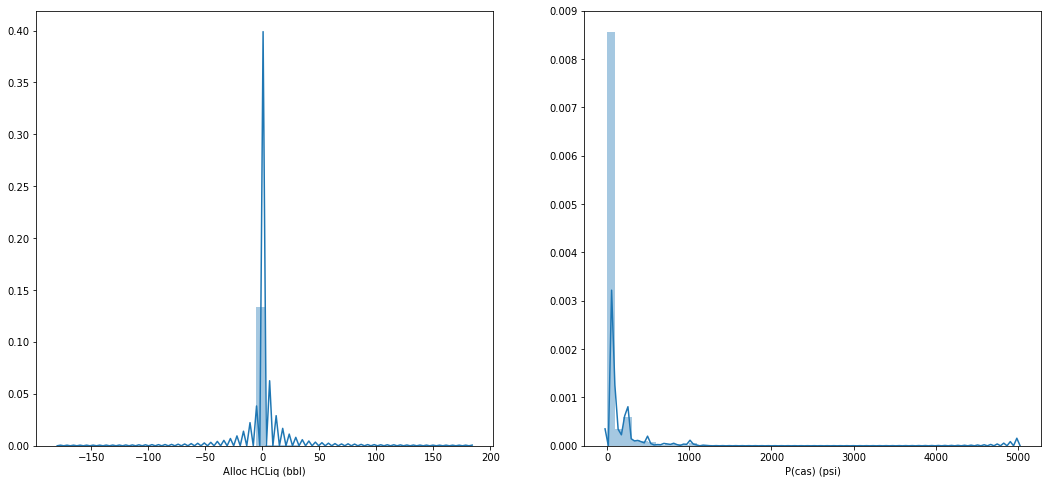

Oil Well:  5 FLANAGAN #2


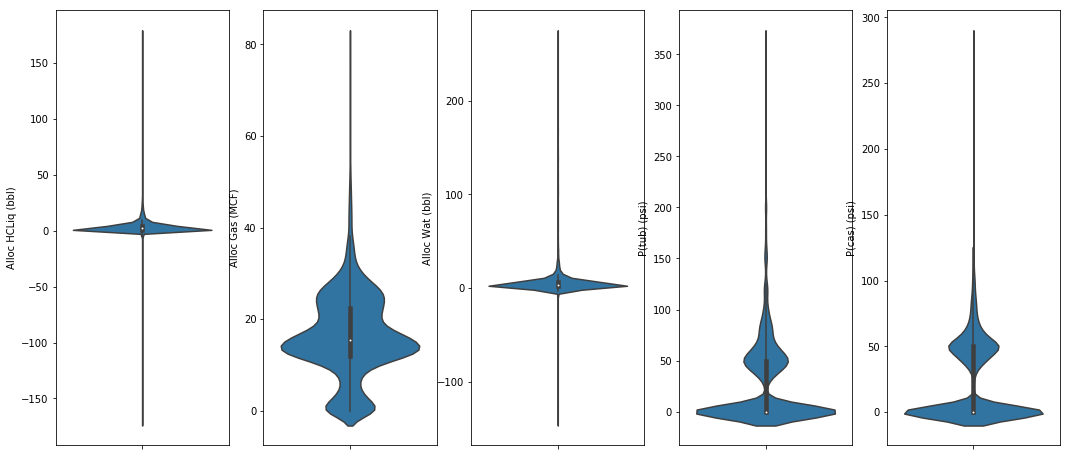

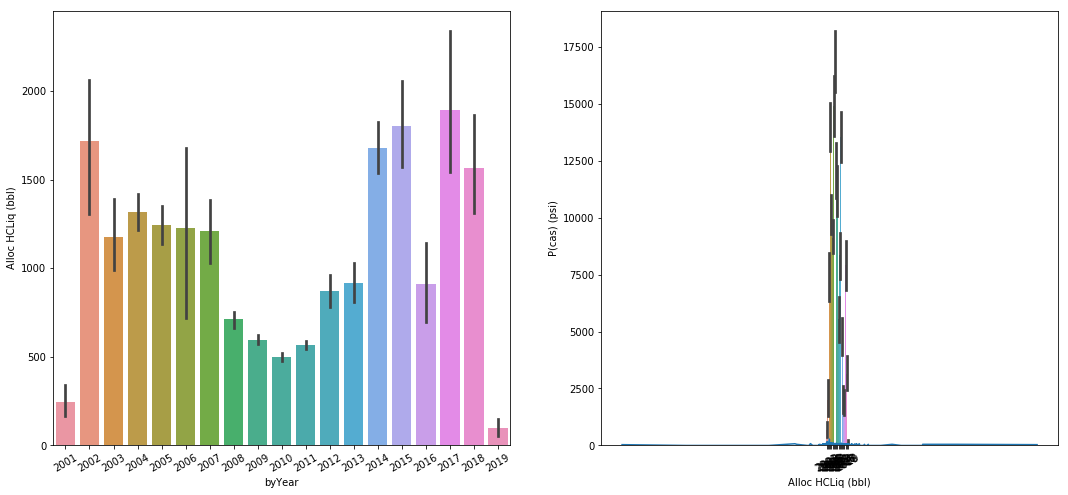

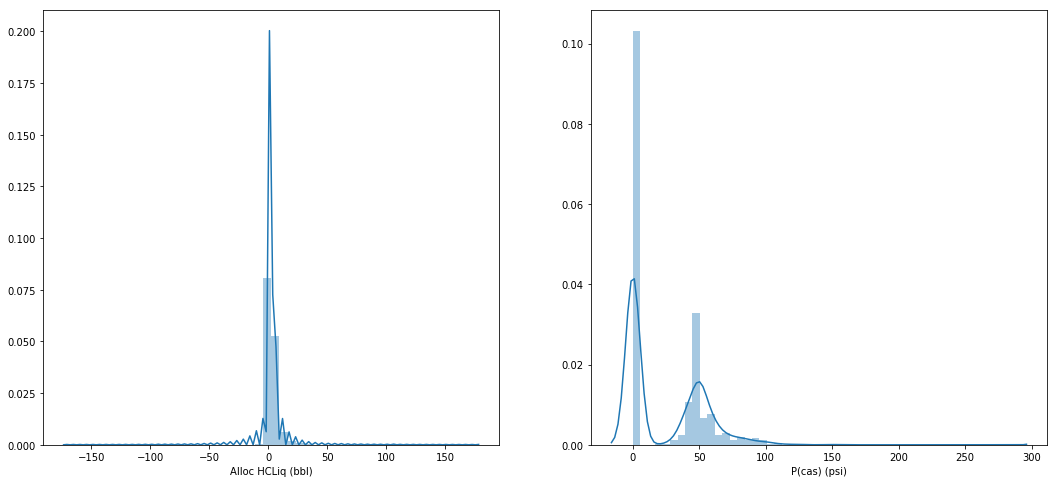

In [133]:
usesheets = [2,5]
for k in (usesheets):
    print('Oil Well: ', k, sheets[k])
    Well = ds[sheets[k]].iloc[4:,:-1]
    Well.columns = cols
    Well['Date'] = pd.to_datetime(Well['Date'])
    for i in range(1,9):
        Well[cols[i]] = Well[cols[i]].astype('float')
    Well_DS = Well[['Date','Alloc HCLiq (bbl)','Alloc Gas (MCF)', 'Alloc Wat (bbl)', 'P(tub) (psi)', 'P(cas) (psi)']]
    ds_cols = Well_DS.columns

    fg,ax = plt.subplots(nrows=1,ncols=5,figsize=(18, 8))
    for j in range(5):
        name = ds_cols[j+1]
        sns.violinplot(y=name, data=Well_DS, ax=ax[j])

    #print(Well_DS.describe())
    Well_DS['byYear'] = Well_DS.Date.dt.to_period("Y")
    Well_DS.set_index(Well_DS['Date'], inplace=True)
    fg,ax = plt.subplots(nrows=1,ncols=2,figsize=(18, 8))
    g = sns.barplot(x='byYear', y='Alloc HCLiq (bbl)', data=Well_DS, estimator=sum, ax=ax[0])
    g.set_xticklabels(g.get_xticklabels(), rotation=30)
    h = sns.barplot(x='byYear', y='P(cas) (psi)', data=Well_DS, estimator=sum, ax=ax[1])
    h.set_xticklabels(h.get_xticklabels(), rotation=30)
    sns.lineplot(data=Well_DS,  x='Alloc HCLiq (bbl)', y = 'P(cas) (psi)')
    fg,ax = plt.subplots(nrows=1,ncols=2,figsize=(18, 8))
    sns.distplot(Well_DS['Alloc HCLiq (bbl)'], ax=ax[0])
    sns.distplot(Well_DS['P(cas) (psi)'], ax=ax[1])
    
    plt.show()

In [169]:
sns.relplot(data=Well_DS,  x='Date', y = 'P(cas) (psi)', kind='line',  hue='Name')
plt.show()

ValueError: Could not interpret input 'Name'

In [170]:
Well_DS.columns

Index(['Date', 'Alloc HCLiq (bbl)', 'Alloc Gas (MCF)', 'Alloc Wat (bbl)',
       'P(tub) (psi)', 'P(cas) (psi)', 'byYear'],
      dtype='object')

In [183]:
# Get all well data into one dataframe
columns = ['Name','Date','Alloc HCLiq (bbl)','Alloc Gas (MCF)', 'Alloc Wat (bbl)', 'P(tub) (psi)', 'P(cas) (psi)']
SpecificWells = pd.DataFrame(columns=columns)
for k in (usesheets):
    print(k,sheets[k])
    Well = ds[sheets[k]].iloc[4:,:-1]
    Well.columns = cols
    Well['Date'] = pd.to_datetime(Well['Date'])
    for i in range(1,9):
        Well[cols[i]] = Well[cols[i]].astype('float')
    Well['Name'] =  sheets[k]
    Well_DS = Well[columns]
    SpecificWells = SpecificWells.append(Well_DS)
    

2 CHRISTIAN #8
5 FLANAGAN #2
8 LONE STAR #2
9 SHARPE, DOT #2
10 FURRH, JD JR. ET AL #1
12 AVERY RENEE GU 1 #1
15 STEWART, G.P. #5  (AUSTIN CHALK
16 WILL FORESTER GU 1 #1
17 LINNIE -M- GAS UNIT #6     (TRA
18 LINNIE -M- GAS UNIT #8


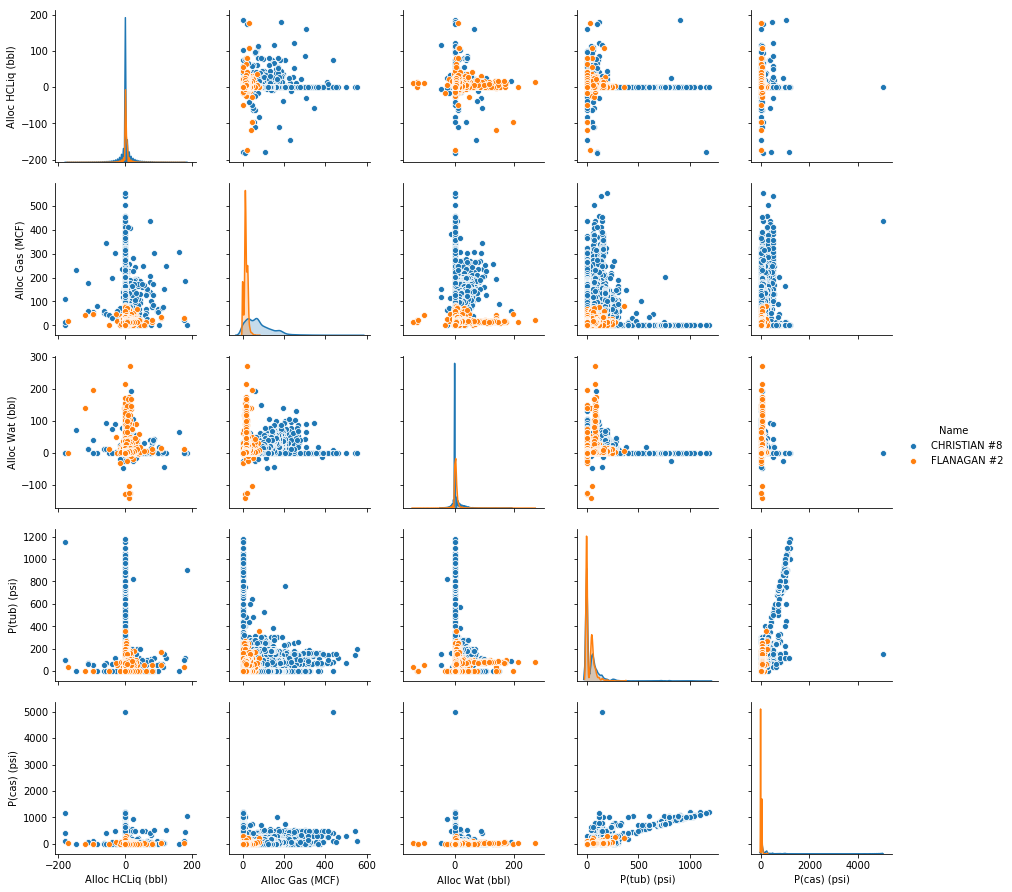

In [127]:
sns.pairplot(SpecificWells, hue='Name')
plt.show()

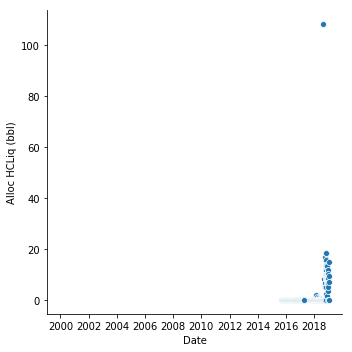

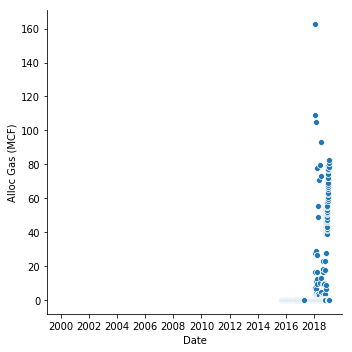

In [207]:
cols = SpecificWells.columns
#for i in range(2,len(cols)):
 #   if ( i%2 == 0):
  #      f, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 8))
   # sns.relplot(data=Well_DS,  x='Date', y = cols[i], kind='scatter', ax= axes[i%2])
    
#f, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 8))
sns.relplot(data=Well_DS,  x='Date', y = cols[2], kind='scatter')
sns.relplot(data=Well_DS,  x='Date', y = cols[3], kind='scatter')
plt.show()

In [174]:
SpecificWells.columns[1]

'Date'

In [123]:
#sns.pairplot(SpecificWells, hue='Name')
sns.pairplot(SpecificWells[(SpecificWells.Name==sheets[usesheets[0]]) | (SpecificWells.Name==sheets[usesheets[1]])| (SpecificWells.Name==sheets[usesheets[2]])
              | (SpecificWells.Name== sheets[usesheets[3]]) | (SpecificWells.Name== sheets[usesheets[4]])], hue='Name')
sns.pairplot(SpecificWells[(SpecificWells.Name==sheets[usesheets[5]]) | (SpecificWells.Name==sheets[usesheets[6]])| (SpecificWells.Name==sheets[usesheets[7]])
              | (SpecificWells.Name== sheets[usesheets[8]]) | (SpecificWells.Name== sheets[usesheets[9]])], hue='Name', kind='line')
plt.show()


IndexError: list index out of range

In [136]:
g = Well_DS.groupby('byYear')
g.groups

{Period('2001', 'A-DEC'): DatetimeIndex(['2001-10-01', '2001-10-02', '2001-10-03', '2001-10-04',
                '2001-10-05', '2001-10-06', '2001-10-07', '2001-10-08',
                '2001-10-09', '2001-10-10', '2001-10-11', '2001-10-12',
                '2001-10-13', '2001-10-14', '2001-10-15', '2001-10-16',
                '2001-10-17', '2001-10-18', '2001-10-19', '2001-10-20',
                '2001-10-21', '2001-10-22', '2001-10-23', '2001-10-24',
                '2001-10-25', '2001-10-26', '2001-10-27', '2001-10-28',
                '2001-10-29', '2001-10-30', '2001-10-31', '2001-11-01',
                '2001-11-02', '2001-11-03', '2001-11-04', '2001-11-05',
                '2001-11-06', '2001-11-07', '2001-11-08', '2001-11-09',
                '2001-11-10', '2001-11-11', '2001-11-12', '2001-11-13',
                '2001-11-14', '2001-11-15', '2001-11-16', '2001-11-17',
                '2001-11-18', '2001-11-19', '2001-11-20', '2001-11-21',
                '2001-11-22', '2001-11-

In [144]:
Well_DS.describe()

,Alloc HCLiq (bbl),Alloc Gas (MCF),Alloc Wat (bbl),P(tub) (psi),P(cas) (psi)
count,6316.000000,6316.000000,6316.000000,6316.000000,6316.000000
mean,3.207368,16.490329,5.945088,27.974193,23.026124
std,6.213215,9.278164,13.916837,39.234720,29.245256
min,-172.035995,0.000000,-142.190994,0.000000,0.000000
25%,0.552000,12.002750,1.676750,0.000000,0.000000
50%,1.948500,15.522000,3.330000,0.000000,0.000000
75%,4.290250,22.542500,6.660000,50.000000,50.000000
max,176.951996,79.886002,270.812988,360.000000,280.000000


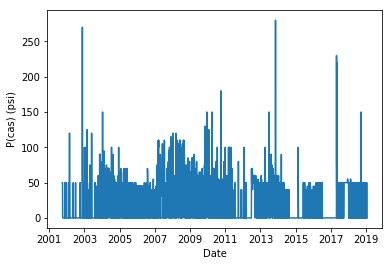

In [161]:
sns.lineplot(data=Well_DS,  x='Date', y = 'P(cas) (psi)')
plt.show()